# **2. EDA (Exploratory Data Analysis)**

Exploratory Data Analysis (EDA) is a process used to understand, clean, and prepare data before analyzing it or building models. First, it is essential to clearly define the objectives: what do we want to discover or solve with the data? Next, we perform an initial inspection to understand the structure of the data, the types of variables, and any potential initial issues. We analyze each variable individually and examine the relationships between them to identify patterns and trends. We detect and handle missing values (part of this task has already been done) and outliers to avoid distortions in the analysis. This entire process helps us prepare clean and structured data, ready to be used for the predictive models we will build later.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr

Load .csv dataset

In [2]:
df_cleaned = pd.read_csv("dataframe_final.csv",sep=",")
column_translation = {
    'Any': 'Year',
    'Mes': 'Month',
    'Dia': 'Day',
    'Tram_Horari': 'Time_Slot',
    'Codi_Postal': 'Postal_Code',
    'Valor': 'Value',
    'temperature_2m': 'Temperature_2m',
    'apparent_temperature': 'Apparent_Temperature',
    'wind_speed_10m': 'Wind_Speed_10m',
    'sunshine_duration': 'Sunshine_Duration',
    'direct_radiation': 'Direct_Radiation',
    'Dia_Setmana': 'Weekday',
    'Tasa interanual del IPI': 'Yearly_IPI_Rate',
    'dew_point_2m': 'Dew_Point_2m'
}

df_cleaned.rename(columns=column_translation, inplace=True)
df_cleaned.describe()

,Year,Month,Day,Time_Slot,Postal_Code,Value,Temperature_2m,Apparent_Temperature,Wind_Speed_10m,Sunshine_Duration,Direct_Radiation,Weekday,Yearly_IPI_Rate,Dew_Point_2m
count,348030.000000,348030.000000,348030.000000,348030.000000,348030.000000,348030.000000,348030.000000,348030.000000,348030.000000,348030.000000,348030.000000,348030.000000,348030.000000,348030.000000
mean,2021.361371,6.419093,15.821625,2.499787,8021.482174,101077.228582,16.493652,15.894976,9.636141,8927.526240,132.840098,4.000132,0.068119,11.304799
std,1.646060,3.378734,8.818198,1.118508,12.118382,56626.111563,6.916633,8.696049,5.371176,9751.004453,168.621376,2.000879,10.523790,6.487438
min,2019.000000,1.000000,1.000000,1.000000,8001.000000,99.000000,-1.472500,-5.783517,0.000000,0.000000,0.000000,1.000000,-34.250000,-13.322500
25%,2020.000000,4.000000,8.000000,1.000000,8011.000000,57872.250000,11.177500,9.136863,5.804825,0.000000,0.000000,2.000000,-3.700000,6.627500
50%,2021.000000,6.000000,16.000000,2.000000,8021.000000,90795.638279,16.377500,15.410418,8.373386,0.000000,9.166667,4.000000,0.380000,11.477500
75%,2023.000000,9.000000,23.000000,4.000000,8032.000000,132299.000000,21.927502,23.278515,12.558790,20244.717000,252.333330,6.000000,2.500000,16.777500
max,2024.000000,12.000000,31.000000,4.000000,8042.000000,350933.000000,36.577500,38.466156,45.001440,21600.000000,557.833300,7.000000,54.460000,25.127500


In [3]:
df_cleaned.shape

ordered_years = df_cleaned.groupby("Year")["Value"].median().sort_values().index

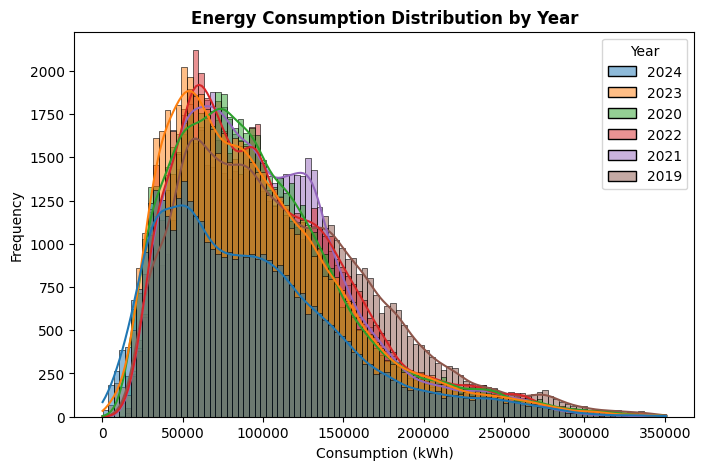

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned, x='Value', hue='Year', bins=100, kde=True, palette="tab10", alpha=0.5, hue_order=ordered_years)
plt.title("Energy Consumption Distribution by Year", fontsize=12, fontweight='bold')
plt.xlabel("Consumption (kWh)")
plt.ylabel("Frequency")
plt.show()

C:\Users\Afran\AppData\Local\Temp\ipykernel_24012\1775610464.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


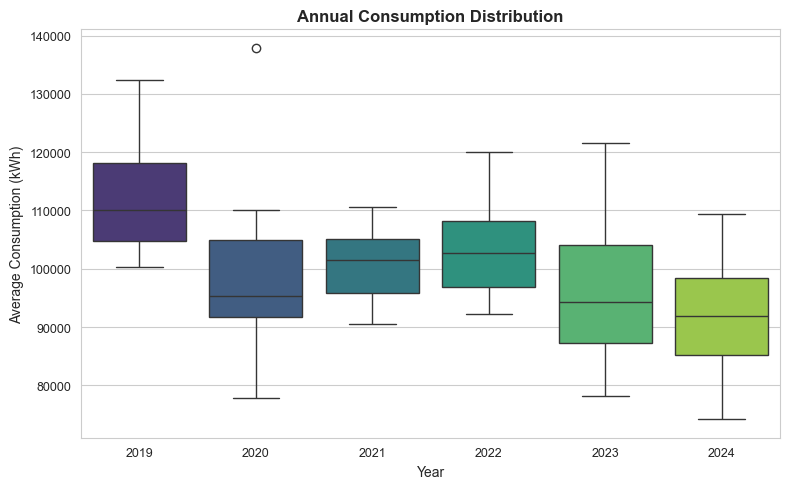

In [5]:
df_aggregated = df_cleaned.groupby(['Year', 'Month'], sort=True).mean(numeric_only=True).reset_index()

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))

sns.boxplot(
    x='Year',
    y='Value',
    data=df_aggregated,
    palette='viridis'
)

plt.title('Annual Consumption Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Average Consumption (kWh)', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()

plt.show()

C:\Users\Afran\AppData\Local\Temp\ipykernel_24012\1827596141.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


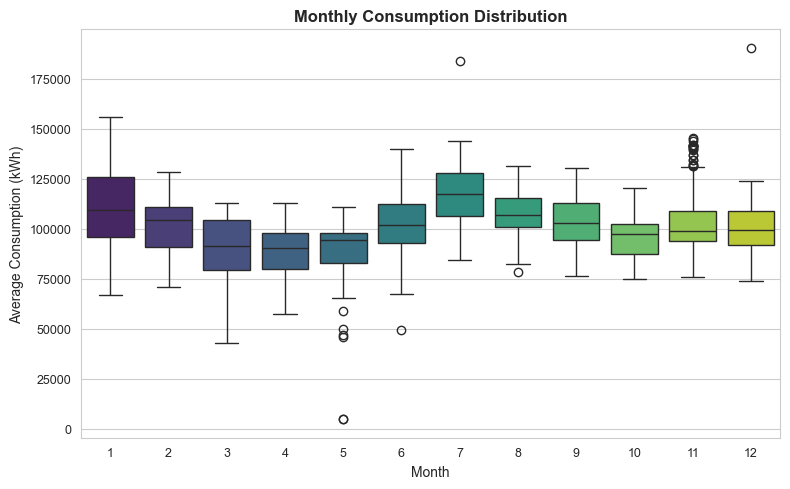

In [6]:
df_aggregated = df_cleaned.groupby(['Year', 'Month', 'Day'], sort=True).mean(numeric_only=True).reset_index()

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))

sns.boxplot(
    x='Month',
    y='Value',
    data=df_aggregated,
    palette='viridis'
)

plt.title('Monthly Consumption Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Average Consumption (kWh)', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()

C:\Users\Afran\AppData\Local\Temp\ipykernel_24012\4112031035.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


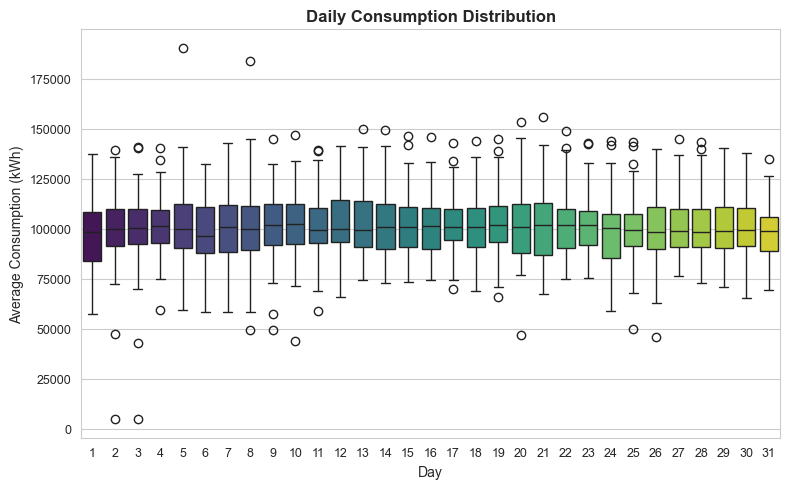

In [7]:
df_aggregated = df_cleaned.groupby(['Year', 'Month', 'Day'], sort=False).mean(numeric_only=True).reset_index()

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))

sns.boxplot(
    x='Day',
    y='Value',
    data=df_aggregated,
    palette='viridis'
)

plt.title('Daily Consumption Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Day', fontsize=10)
plt.ylabel('Average Consumption (kWh)', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()

In [8]:
df_aggregated = df_cleaned.groupby(["Time_Slot", "Year", "Month", "Day"], sort=True).mean(numeric_only=False).reset_index()

def convert_time_slot(row):
    if row['Time_Slot'] == 1:
        return "0h-6h"
    elif row['Time_Slot'] == 2:
        return "6h-12h"
    elif row['Time_Slot'] == 3:
        return "12h-18h"
    elif row['Time_Slot'] == 4:
        return "18h-24h"
    else:
        return "Other"

C:\Users\Afran\AppData\Local\Temp\ipykernel_24012\2875879471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


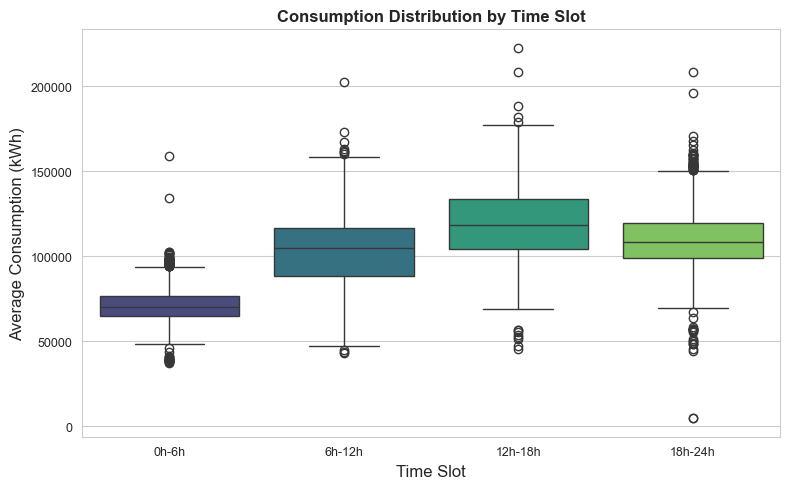

In [9]:
df_aggregated['Time_Slot'] = df_aggregated.apply(convert_time_slot, axis=1)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Time_Slot',
    y='Value',
    data=df_aggregated,
    palette='viridis'
)
plt.title('Consumption Distribution by Time Slot', fontsize=12, fontweight='bold')
plt.xlabel('Time Slot', fontsize=12)
plt.ylabel('Average Consumption (kWh)', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

In [10]:
# Group and calculate statistics
df_aggregated = df_cleaned.groupby(["Time_Slot", "Year", "Month", "Day"], sort=True).agg({'Value': ['mean', 'min', 'max']}).reset_index()

# Flatten MultiIndex columns
df_aggregated.columns = ['Time_Slot', 'Year', 'Month', 'Day', 'Value_mean', 'Value_min', 'Value_max']

# Function to convert Time_Slot to label
def convert_time_slot(tram):
    if tram == 1:
        return "0h-6h"
    elif tram == 2:
        return "6h-12h"
    elif tram == 3:
        return "12h-18h"
    elif tram == 4:
        return "18h-24h"
    else:
        return "Other"


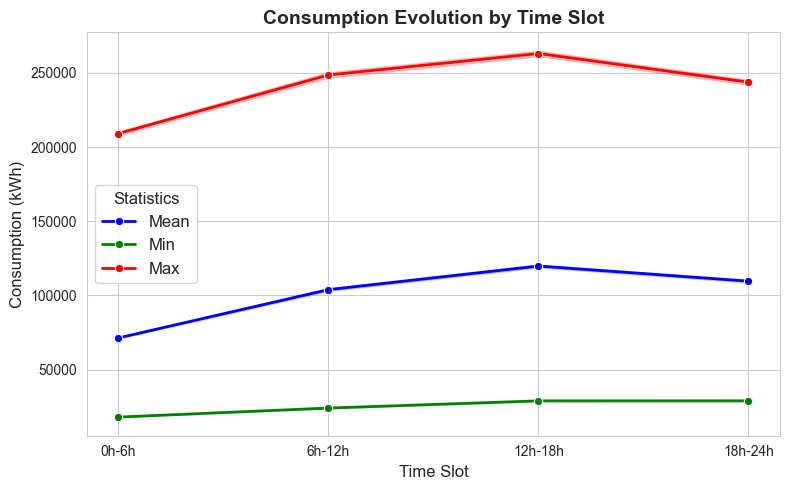

In [11]:
# Apply function
df_aggregated['Time_Slot_Label'] = df_aggregated['Time_Slot'].apply(convert_time_slot)

# Sort the time slots correctly
time_slot_order = ["0h-6h", "6h-12h", "12h-18h", "18h-24h"]
df_aggregated['Time_Slot_Label'] = pd.Categorical(df_aggregated['Time_Slot_Label'], categories=time_slot_order, ordered=True)

# Create plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

sns.lineplot(
    x='Time_Slot_Label',
    y='Value_mean',
    data=df_aggregated,
    label='Mean',
    marker='o',
    linewidth=2,
    color='blue'
)

sns.lineplot(
    x='Time_Slot_Label',
    y='Value_min',
    data=df_aggregated,
    label='Min',
    marker='o',
    linewidth=2,
    color='green'
)

sns.lineplot(
    x='Time_Slot_Label',
    y='Value_max',
    data=df_aggregated,
    label='Max',
    marker='o',
    linewidth=2,
    color='red'
)

plt.title('Consumption Evolution by Time Slot', fontsize=14, fontweight='bold')
plt.xlabel('Time Slot', fontsize=12)
plt.ylabel('Consumption (kWh)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Statistics', title_fontsize=12, fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Afran\AppData\Local\Temp\ipykernel_24012\1407785800.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Postal_Code", y="Value", data=df_aggregated, palette="viridis")


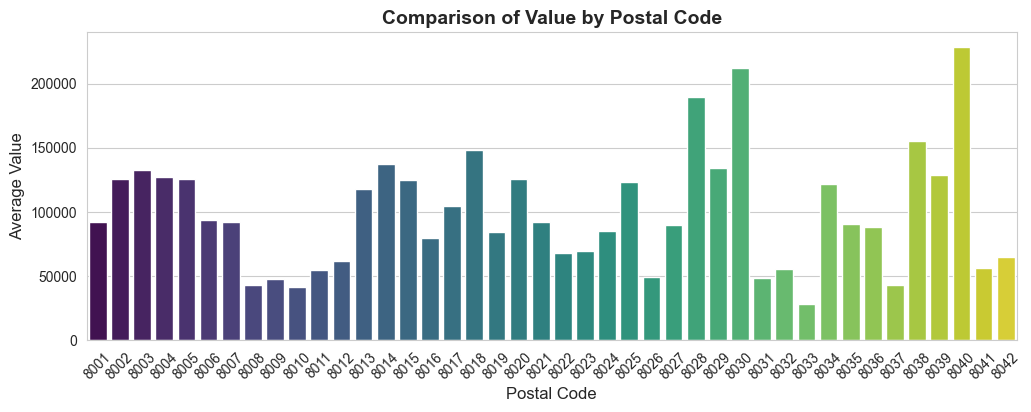

In [12]:
# Group data by postal code and calculate the median
df_aggregated = df_cleaned.groupby("Postal_Code", sort=False).median(numeric_only=True).reset_index()

# Adjust figure size
plt.figure(figsize=(12, 4))

# Create the bar chart
sns.barplot(x="Postal_Code", y="Value", data=df_aggregated, palette="viridis")

# Add title and labels
plt.title("Comparison of Value by Postal Code", fontsize=14, fontweight="bold")
plt.xlabel("Postal Code", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.xticks(rotation=45)  # Rotate the labels if necessary

# Show the plot
plt.show()

Next, we will compare *distance correlation* (DCOR) with other traditional correlation methods such as Pearson and Spearman, on our dataset.

* **Pearson Correlation:** Measures the linear relationship between two variables. It is suitable when there is a clear and direct relationship, such as a straight line, between the variables.

* **Spearman Correlation:** Measures the monotonic relationship (i.e., when both variables evolve in the same direction, but not necessarily in a linear manner). It can detect non-linear relationships that are monotonic, such as ascending or descending curves.

* **Distance Correlation (DCOR):** Unlike Pearson and Spearman, distance correlation measures all types of dependencies between two variables, whether linear or non-linear. It is more flexible and can detect any kind of relationship between variables, such as curves, oscillations, or other complex relationships.


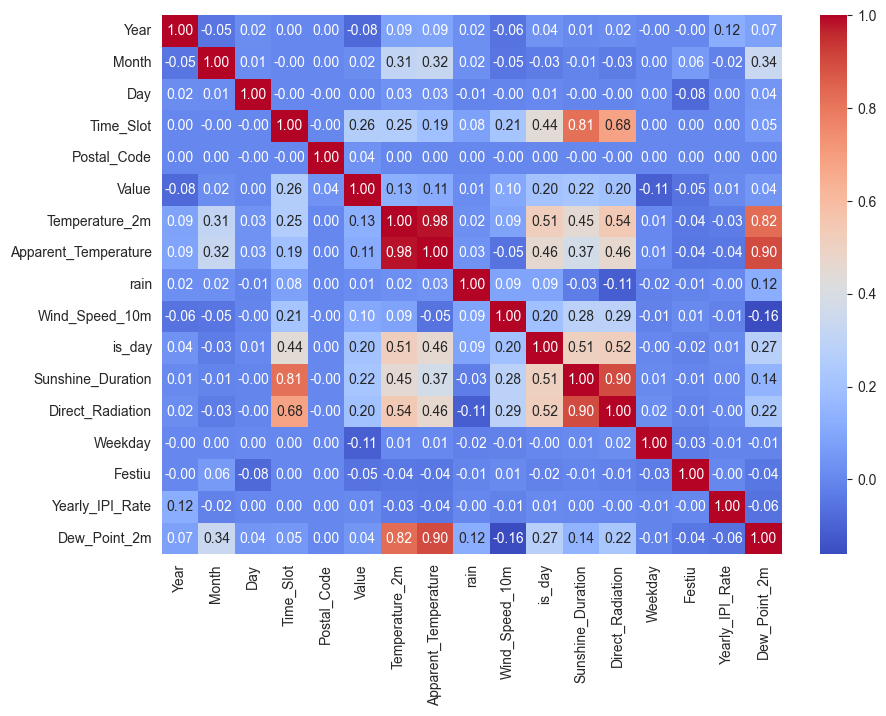

In [13]:
corr = df_cleaned.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

C:\Users\Afran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\dcor\_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
C:\Users\Afran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\dcor\_dcor_internals.py:188: RuntimeWarning: overflow encountered in scalar multiply
  third_term = a_total_sum * b_total_sum / n_samples
C:\Users\Afran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\dcor\_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms becaus

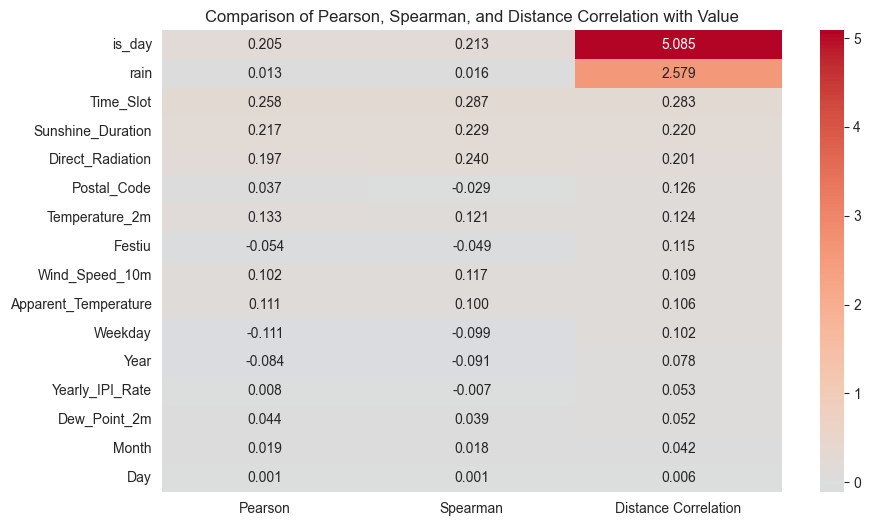

In [14]:
import dcor

# Pearson and Spearman correlations
pearson_corr = df_cleaned.corr(method="pearson")["Value"].drop("Value")
spearman_corr = df_cleaned.corr(method="spearman")["Value"].drop("Value")

# Distance Correlation
distance_corr = {
    col: dcor.distance_correlation(df_cleaned["Value"], df_cleaned[col])
    for col in df_cleaned.columns if col != "Value"
}
distance_corr = pd.Series(distance_corr)

# Combine results into a dataframe
df_corr = pd.DataFrame({
    "Pearson": pearson_corr,
    "Spearman": spearman_corr,
    "Distance Correlation": distance_corr
}).sort_values(by="Distance Correlation", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", center=0, fmt=".3f")
plt.title("Comparison of Pearson, Spearman, and Distance Correlation with Value")
plt.show()